### Homework: Least Action using Minimization

Use function "minimize from scipy.optimize" and the method called ‘SLSQP’ to minimize:  the action S.

This task is basically identical to the example from the class. Use the same parameters (t=3.0,m=0.2 n=21) and both functions: xfit() and S().

For more details on the scipy.optimize.minimize read the documentation:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

Please note that the output of this function is different that from the "optimize.fmin_powell" that we did in the class

* here: obj = scipy.optimize.minimize(...)

the output of the process is an object (obj) so to access the information of the minimization you can type:

* print(obj), or print(dir(obj))
* look at the attributes (x, success, status, message, fun)
* then choose the attribute you are interested in, example: 

print(obj.message)

* details on the attributes are here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult)

* compare by plotting the two minimization routines, the one from the class "optimize.fmin_powell" with "scipy.optimize.minimize"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.optimize import minimize
global g
g=9.8

def S(x,tend=3.,m=0.2,xini=0.,xend=0.):
    x=np.asarray(x)
    Dt=tend/x[:-1].size
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ( (0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]) )*Dt).sum()

def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):    #Usando optimize.fmin_powell
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
    x0=np.zeros(n)
    a = optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1) #Minimiza la función de la acción
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]   #Sort ordena de menor a mayor
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt

def xfitSLSQP(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8): #Usando SLSQP
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
    x0=np.zeros(n)
    a = optimize.minimize(S,x0,args=(t,m,xini,xend),method='SLSQP') #Minimiza la función de la acción con SLSQP
    xs=a['x']                                                     #El SLSQP entrega un diccionario, la lista la entrega con el nombre 'x'
    xs[0]=xini;xs[-1]=xend
    xmaxs=np.sort(x)[-1]   #Sort ordena de menor a mayor
    Smins=a['fun']                                                #El valor minimo de la función con SLSQP la entrega con el nombre 'fun'
    Dts=t/x[:-1].size #  t/(n-1)
    return xs,xmaxs,Smins,Dts

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5837


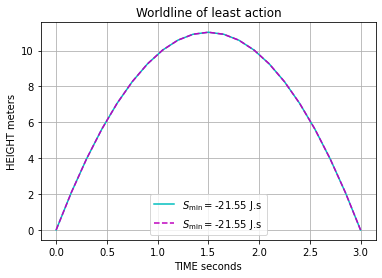

In [2]:
t=3.0
n=21
m=0.2
y=xfit(21, 3.0, 0.2)
x=y[0]
xmax=y[1]
Smin=y[2]
Dt=y[-1]
tx=np.arange(0,t+Dt,Dt)

ys=xfitSLSQP(21, 3.0, 0.2)
xs=ys[0]
xmaxs=ys[1]
Smins=ys[2]
Dts=ys[-1]
txs=np.arange(0,t+Dts,Dts)

plt.plot(tx,x,'-c',label='$S_{\mathrm{min}}=$%.2f J.s' %Smin)   #Gráfica de la función usando fmin_powell
plt.plot(txs,xs,'--m',label='$S_{\mathrm{min}}=$%.2f J.s' %Smins)  #Gráfica de la función usando SLSQP
#plt.plot(tx,x,'ro')
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.legend(loc='best')
plt.grid()

In [3]:
#Finalmente, los dos métodos encuentran el mismo valor para el least action y trazan la misma trayectoria para los puntos dados.

In [4]:
t=3.0
xini=0
xend=0
n=21
if n%2==0:
    print ('x array must be odd')
x0=np.zeros(n)
a = optimize.minimize(S,x0,args=(t,m,xini,xend),method='SLSQP') 


In [5]:
a      

     fun: -21.554977470134183
     jac: array([ 0.00000000e+00,  1.25169754e-04, -1.52587891e-05, -7.62939453e-06,
       -8.15391541e-05,  1.61170959e-04, -8.41617584e-05,  4.38690186e-05,
       -1.12056732e-05, -6.79492950e-05, -4.76837158e-07, -6.84261322e-05,
       -9.77516174e-06,  4.22000885e-05, -8.32080841e-05,  1.58071518e-04,
       -7.43865967e-05, -1.64508820e-05, -8.10623169e-06,  1.20639801e-04,
        0.00000000e+00])
 message: 'Optimization terminated successfully'
    nfev: 326
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([1.01451261e-15, 2.09479625e+00, 3.96899864e+00, 5.62271249e+00,
       7.05593218e+00, 8.26871297e+00, 9.26087282e+00, 1.00325958e+01,
       1.05837860e+01, 1.09144847e+01, 1.10247345e+01, 1.09144847e+01,
       1.05837862e+01, 1.00325952e+01, 9.26087246e+00, 8.26871223e+00,
       7.05593341e+00, 5.62271053e+00, 3.96899997e+00, 2.09479527e+00,
       0.00000000e+00])

In [6]:
a['fun']

-21.554977470134183